In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Cleaned Dataset

In [115]:
#Print head of cleaned dataset
DatabaseDF = pd.read_csv("../CleanedDataset.csv")
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


# Imputed Datasets

## Categorical Variables

In [116]:
#Imputed Dataset with categorical variables
ImputedDS = pd.read_csv("../DatasetIIandCI.csv")
ImputedDS.head()

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,...,Best12 Mo BOPD,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Year Drilled,Operator,Formation,Fluid Type from DI,Completion Type
0,0,5114.0,30.000000,141.0,99.0,10.0,0.0,16079.0,141.518738,127.690116,...,88.275258,47.051150,-103.214580,660.0,33.55,2006.0,Operator 1,MBH,SLICKWATER (HC),P & P
1,1,5181.0,-1.722697,142.0,99.0,16.0,418000.0,7269.0,197.764629,127.832566,...,72.019505,47.111368,-103.225059,660.0,27.62,2005.0,Operator 2,MBH,CROSSLINKED (HC),P & P
2,2,4780.0,15.000000,142.0,99.0,24.0,568407.0,8279.0,52.071006,44.334867,...,28.566732,47.097032,-103.160910,660.0,11.19,2006.0,Operator 2,MBH,CROSSLINKED (HC),OH
3,3,10654.0,1.000000,142.0,99.0,1.0,845000.0,9342.0,136.752137,120.764848,...,75.882095,47.140248,-103.178391,660.0,27.85,2007.0,Operator 1,MBH,SLICKWATER (HC),P & P
4,4,5209.0,1.000000,142.0,99.0,35.0,297366.0,4523.0,249.178172,227.580539,...,140.033969,47.080872,-103.181300,660.0,50.88,2006.0,Operator 2,MBH,CROSSLINKED (HC),OH


## Quantitative Variables

In [117]:
#Imputed Dataset with quantitative variables
MICE_DF= pd.read_csv("../IterativeImputeDS.csv")
MICE_DF.head()

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,Best6 Mo BOPD,Best9 Mo BOPD,Best12 Mo BOPD,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Year Drilled
0,0,5114.0,30.000000,141.0,99.0,10.0,0.0,16079.0,141.518738,127.690116,110.009862,97.351888,88.275258,47.051150,-103.214580,660.0,33.55,2006.0
1,1,5181.0,-1.722697,142.0,99.0,16.0,418000.0,7269.0,197.764629,127.832566,99.128863,83.694938,72.019505,47.111368,-103.225059,660.0,27.62,2005.0
2,2,4780.0,15.000000,142.0,99.0,24.0,568407.0,8279.0,52.071006,44.334867,36.905545,31.766382,28.566732,47.097032,-103.160910,660.0,11.19,2006.0
3,3,10654.0,1.000000,142.0,99.0,1.0,845000.0,9342.0,136.752137,120.764848,99.172693,86.675433,75.882095,47.140248,-103.178391,660.0,27.85,2007.0
4,4,5209.0,1.000000,142.0,99.0,35.0,297366.0,4523.0,249.178172,227.580539,189.869603,163.163854,140.033969,47.080872,-103.181300,660.0,50.88,2006.0


# Model Definition: Pareto Chart

A Pareto Chart is a combination of a bar graph and line graph used in Economics and Business that shows the influence that various (independent) categorical variables have on a continuous (dependent) variable in the dataset. The bars are ordered such that the most frequent or prominent independent variable is on the left and the least significant variable is on the right. The line graph represent the cumulative percentages of the dependent variable and how each independent variable contributes to that percentage.

This model is more of a tool that helps analyze different features and which of them should be prioritized; it is not used for estimating a value. Pareto Charts are good if you want to narrow down the features to find the most frequent/prominent  ones, so that you can focus on the ones that are the most impactful for the final product or for a certain variable.

A Pareto Chart can be applied to oil because it can be help us narrow down certain variables by seeing which ones affect cumulative oil production the most. From there, we can decide how to distribute resources in order to maximize production. 

# Plotting Formation Type against Cumulative Oil Production.

## Cleaned Data

In [123]:
#Calculate cumulative oil production for each formation type
FormationProd = DatabaseDF.groupby('Formation')['12 month Cum Prod'].sum().sort_values(ascending = False)

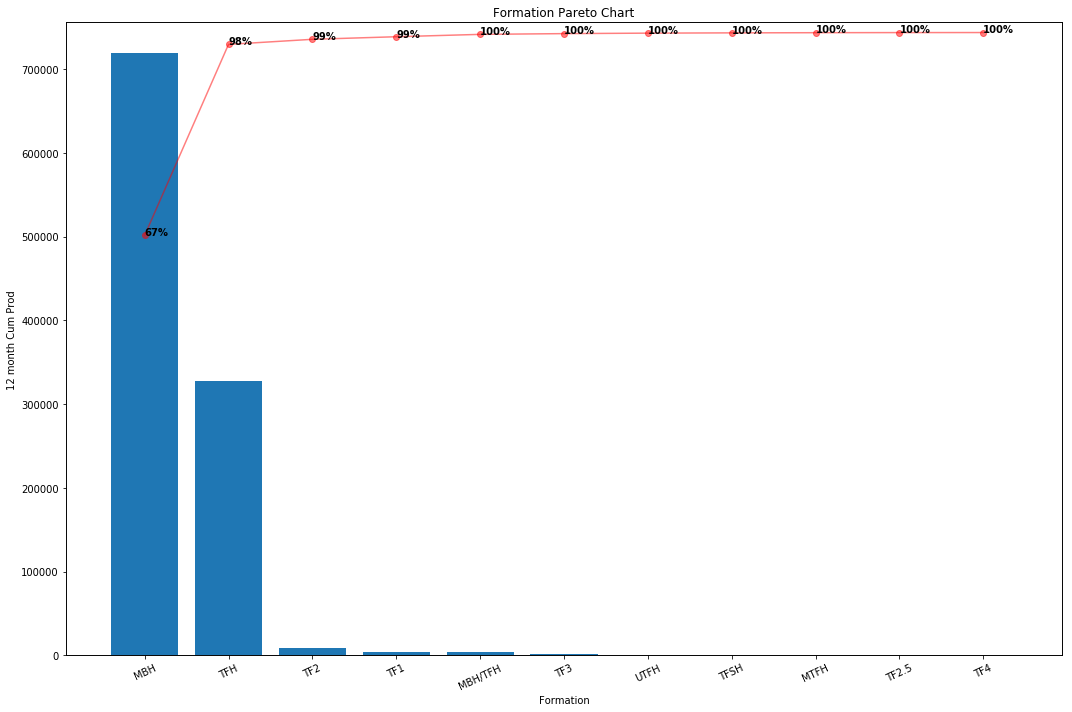

In [124]:
#Plot Pareto Chart of Formation Type versus Cumulative Production
pareto_plot(x = FormationProd.index, counts = FormationProd.values, xlabel = 'Formation', ylabel = '12 month Cum Prod')

## Imputed Data

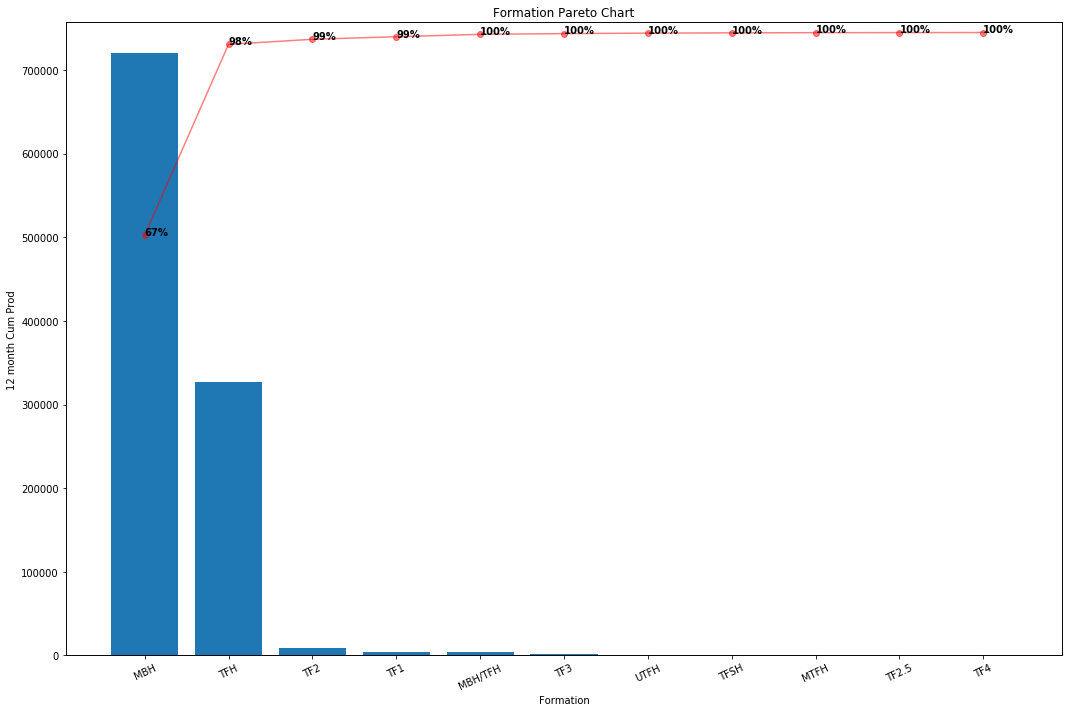

In [127]:
#Calculate cumulative oil production for each formation type
FormationProd = ImputedDS.groupby('Formation')['12 month Cum Prod'].sum().sort_values(ascending = False)

#Plot Pareto Chart of Formation Type versus Cumulative Production
pareto_plot(x = FormationProd.index, counts = FormationProd.values, xlabel = 'Formation', ylabel = '12 month Cum Prod')

The MBH and TFH formation types seem to be the most impactful on oil production in the dataset, where the MBH formation is associated with 67% of the cumulative production and TFH is associated with 31% of the cumulative production.

# Plotting Completion Type against Cumulative Oil Production.

## Cleaned Data

In [125]:
#Calculate cumulative oil production for each completion type
ComplTypeProd = DatabaseDF.groupby('Completion Type')['12 month Cum Prod'].sum().sort_values(ascending = False)

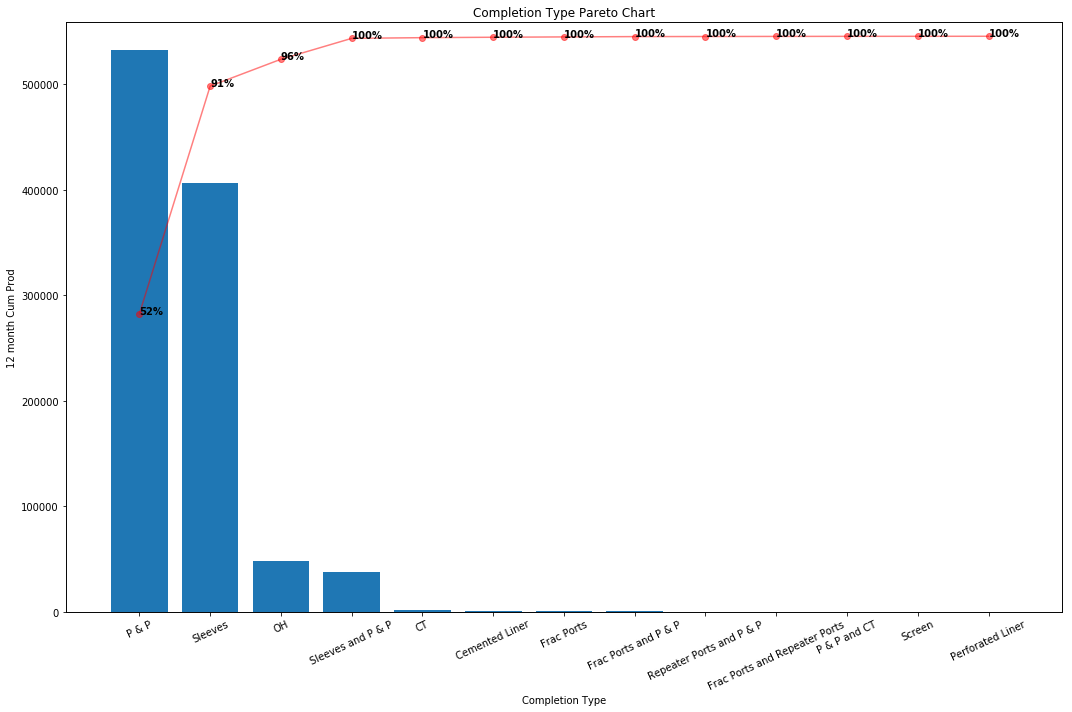

In [126]:
#Plot Pareto Chart of Completion Type versus Cumulative Production
pareto_plot(x = ComplTypeProd.index , counts = ComplTypeProd.values, xlabel = 'Completion Type', ylabel = '12 month Cum Prod')

## Imputed Data

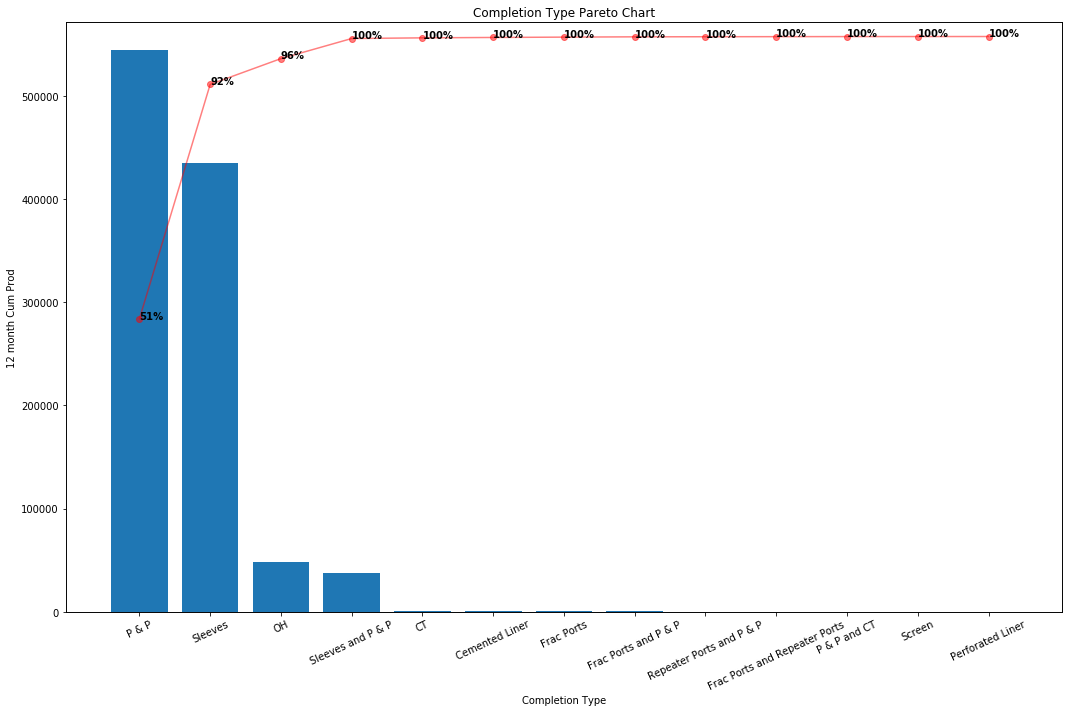

In [206]:
#Calculate cumulative oil production for each completion type
ComplTypeProd = ImputedDS.groupby('Completion Type')['12 month Cum Prod'].sum().sort_values(ascending = False)

#Plot Pareto Chart of Completion Type versus Cumulative Production
pareto_plot(x = ComplTypeProd.index , counts = ComplTypeProd.values, xlabel = 'Completion Type', ylabel = '12 month Cum Prod')

The P&P and Sleeves completion types seem to be the most impactful on the oil production in the dataset, where P&P is associated with around 50% of the cumulative production and Sleeves is associated with around 38% of the cumulative production.

# Plotting Fluid Type against Cumulative Oil Production.

## Cleaned Data

In [131]:
#Calculate cumulative oil production for each fluid type
FluidTypeProd = DatabaseDF.groupby('Fluid Type from DI')['12 month Cum Prod'].sum().sort_values(ascending = False)

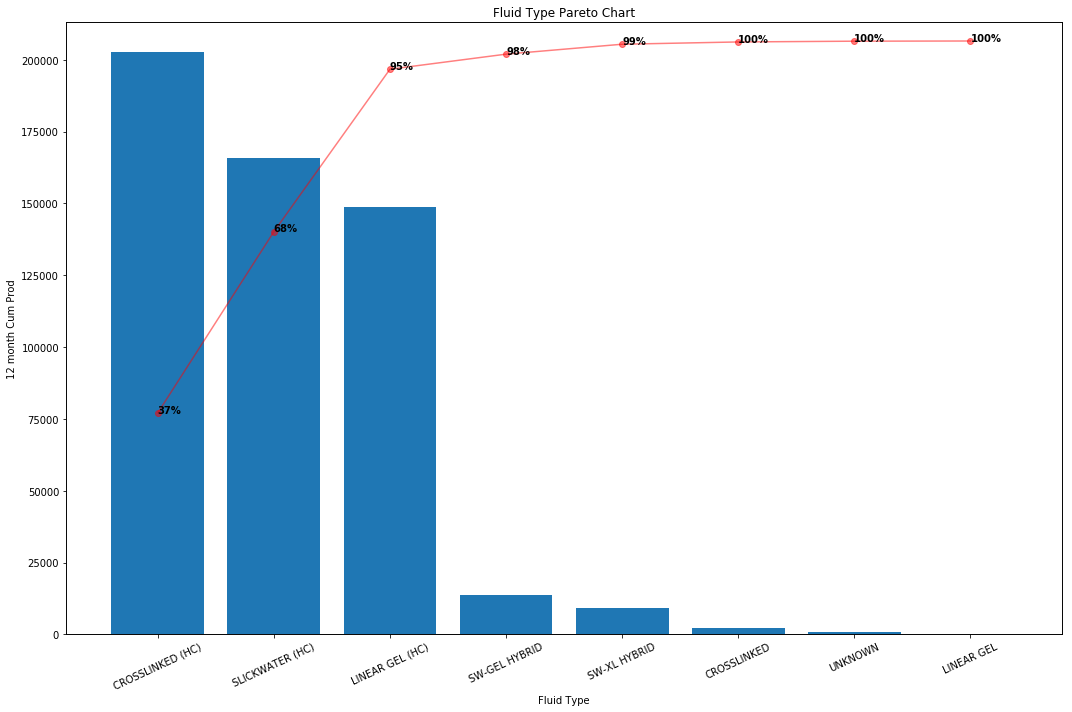

In [132]:
#Plot Pareto Chart of Fluid Type versus Cumulative Production
pareto_plot(x = FluidTypeProd.index , counts = FluidTypeProd.values, xlabel = 'Fluid Type', ylabel = '12 month Cum Prod')

## Imputed Data

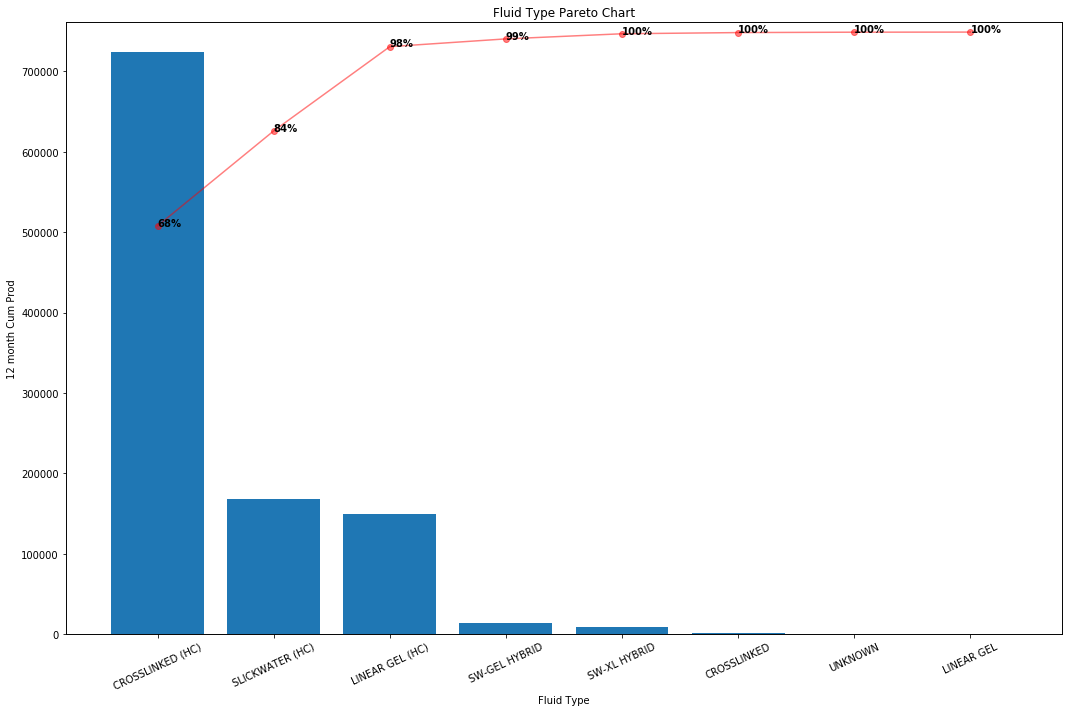

In [133]:
#Calculate cumulative oil production for each fluid type
FluidTypeProd = ImputedDS.groupby('Fluid Type from DI')['12 month Cum Prod'].sum().sort_values(ascending = False)
#Plot Pareto Chart of Fluid Type versus Cumulative Production
pareto_plot(x = FluidTypeProd.index , counts = FluidTypeProd.values, xlabel = 'Fluid Type', ylabel = '12 month Cum Prod')

# Head-Tail Break Clustering Algorithm

After utilizing the imputed data, there is a significant distinction between the Fluid Types. The Crosslinked Fluid seems to be the one that is associated with a higher oil production, at around 68%. 

In [140]:
#Function for head-tails break algorithm, to cluster and group data
def htb(data):
    """
    Applies the head/tail breaks algorithm to an array of data.
    Params
    ------
    data : list
        Array of data to apply ht-breaks
    Returns
    -------
    results : list 
        List of data representing break points
    """
    # test input
    assert data, "Input must not be empty."
    assert all(isinstance(datum, int) or isinstance(datum, float) for datum in data), "All input values must be numeric."

    results = []  # array of break points

    def htb_inner(data):
        """
        Inner ht breaks function for recursively computing the break points.
        """
        # Add mean to results
        data_length = float(len(data))
        data_mean = sum(data) / data_length
        results.append(data_mean)

        # Recursive call to get next break point
        head = [datum for datum in data if datum > data_mean]
        while len(head) > 1 and len(head) / data_length < 0.40:
            return htb_inner(head)

    htb_inner(data)

    return results

# Stage Numbers

## Cleaned Data

In [207]:
#Stage Numbers
DatabaseDF['Stages'].unique()
stage_numbers = [30., 15.,  1., 18., 10.,  2.,  8.,  4., 11., 20., 39., 29.,
       27., 22., 21., 23., 35., 24., 17., 26., 40., 12., 13., 47., 28.,
       50.,  9.,  6., 36.,  5.,  7., 14., 16., 19., 38., 31., 37., 25.,
       32., 34., 33., 51., 45., 54., 43., 46.,  3., 41., 49., 44., 42.,
       48., 80., 56., 64., 69., 62., 59., 55., 94., 60., 57., 53., 65.,
       61., 52., 78., 68., 58., 82., 81., 79., 88., 84., 83., 63., 86.,
       90., 72., 89., 71., 70.]

In [155]:
#Find head-tail break value for stage numbers
htb(stage_numbers)

[42.792682926829265]

In [156]:
#Create bins based on head-tail break algorithm
bins = (0, 42.792682926829265, 94)
groupnames = ['0 - 42', '43 - 94']
DatabaseDF['Stage Bins'] = pd.cut(DatabaseDF['Stages'], bins = bins, labels = groupnames)

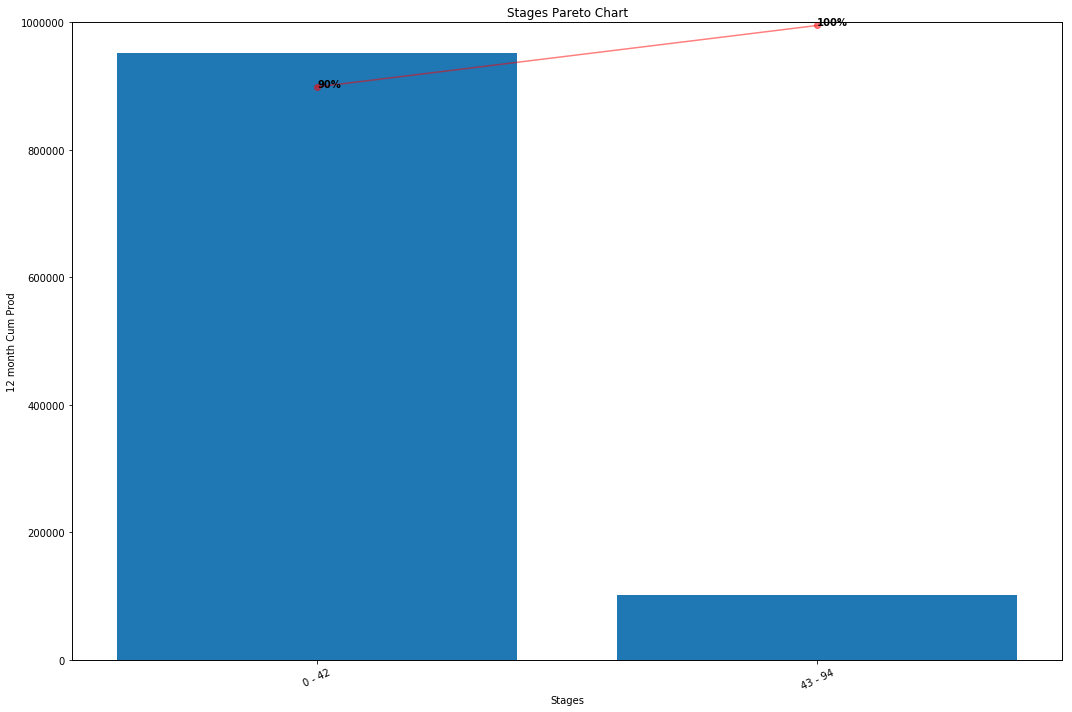

In [157]:
#Calculate cumulative oil production produced depending on the number of stages
Stages_unsorted = DatabaseDF.groupby('Stage Bins')['12 month Cum Prod'].sum()
#Sort chart from highest producing element to least producing element
Stages = Stages_unsorted.sort_values(ascending = False)
#Plot Pareto Chart of Stage Numbers versus Cumulative Production
pareto_plot(x = Stages.index , counts = Stages.values, xlabel = 'Stages', ylabel = '12 month Cum Prod')

## Imputed Data

In [158]:
#Stage Numbers
stage_numbers = []
for i in MICE_DF['Stages'].unique():
    stage_numbers.append(i)

In [159]:
#Find head-tail break value for stage numbers
htb(stage_numbers)

[28.609928648696883, 49.25549405711213]

In [164]:
#Create bins based on head-tail break algorithm
bins = (0, 28.609928648696883, 49.25549405711213, 94)
groupnames = ['0 - 29', '30 - 50', '51 - 94']
MICE_DF['Stage Bins'] = pd.cut(MICE_DF['Stages'], bins = bins, labels = groupnames)

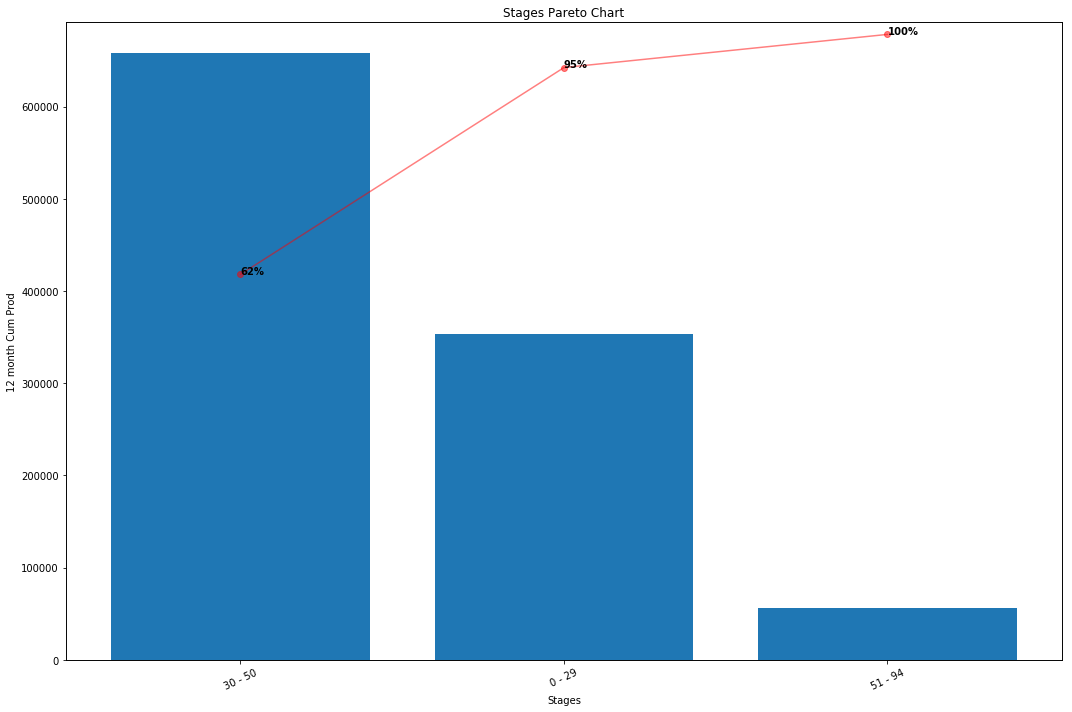

In [165]:
#Calculate cumulative oil production produced depending on the number of stages
Stages_unsorted = MICE_DF.groupby('Stage Bins')['12 month Cum Prod'].sum()
#Sort chart from highest producing element to least producing element
Stages = Stages_unsorted.sort_values(ascending = False)
#Plot Pareto Chart of Stage Numbers versus Cumulative Production
pareto_plot(x = Stages.index , counts = Stages.values, xlabel = 'Stages', ylabel = '12 month Cum Prod')

# Plotting Year Drilled vs Cumulative Oil Production

Before incorporating the imputated data, the Pareto Chart shows that 90% of oil production is associated with stage numbers 0 to 42. After plotting the imputated data, the analysis is slightly more accurate. Stage numbers 30-50 are associated with 62% of the oil production while stage numbers 0 to 29 are associated with 33% of the production.

## Cleaned Data

In [166]:
#Calculate cumulative oil production for each Year Drilled
YearProd_unsorted = DatabaseDF.groupby('Year Drilled')['12 month Cum Prod'].sum()

In [168]:
#Sort chart from highest producing element to least producing element
YearProd = YearProd_unsorted.sort_values(ascending = False)

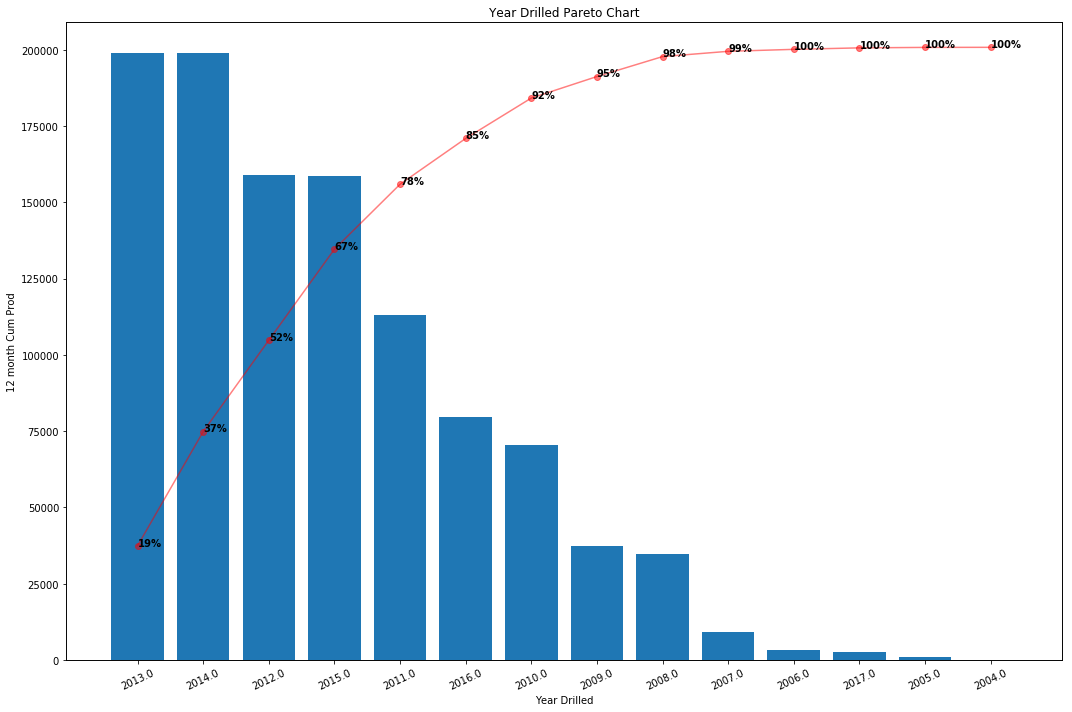

In [169]:
#Plot Pareto Chart of Year Drilled versus Cumulative Production
pareto_plot(x = YearProd.index , counts = YearProd.values, xlabel = 'Year Drilled', ylabel = '12 month Cum Prod')

## Imputed Data

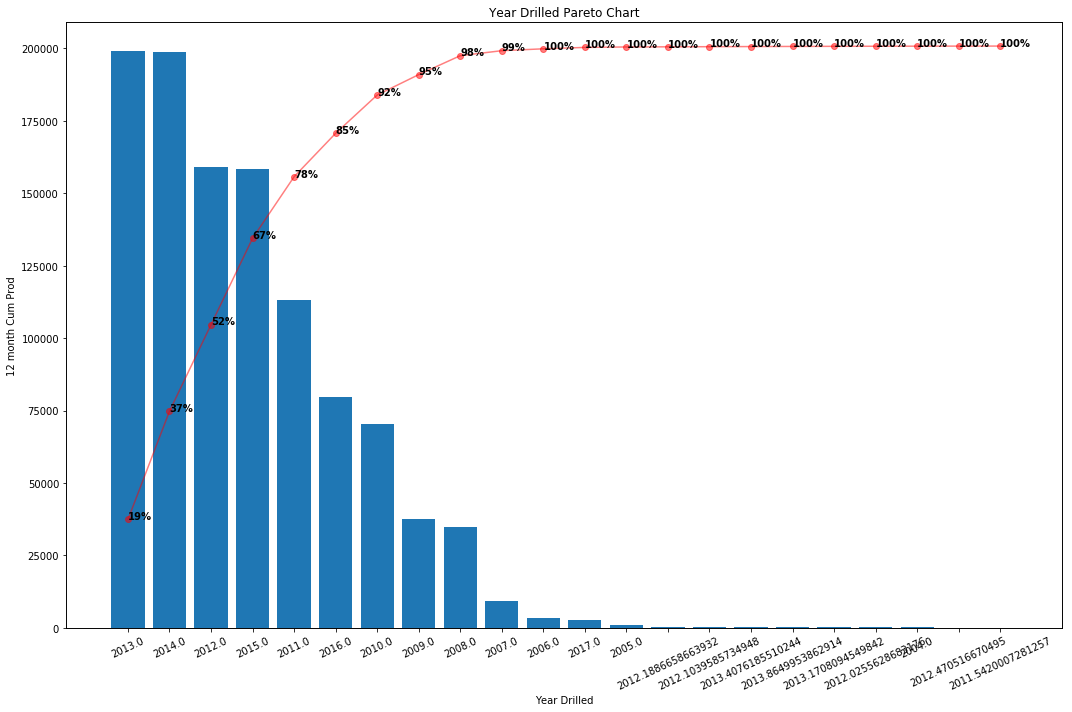

In [170]:
#Calculate cumulative oil production for each Year Drilled
YearProd_unsorted = MICE_DF.groupby('Year Drilled')['12 month Cum Prod'].sum()
#Sort chart from highest producing element to least producing element
YearProd = YearProd_unsorted.sort_values(ascending = False)
#Plot Pareto Chart of Year Drilled versus Cumulative Production
pareto_plot(x = YearProd.index , counts = YearProd.values, xlabel = 'Year Drilled', ylabel = '12 month Cum Prod')

# Plotting Total Proppant versus Oil Production

As shown in the chart, the differences between the years are not extremely high. However the highest producing years are 2013 and 2014.

## Cleaned Data and Imputed Data

In [237]:
#Create 4 bins 
bins = (0, 7186141.75, 14372283.5, 21558425.25, 28744567.0)
groupnames = ['0 - 7.2M lbs', '7.2M - 14.4M lbs', '14.4M - 21.6M', '21.6M - 28.8M']
DatabaseDF['Proppant Bins'] = pd.cut(DatabaseDF['Total Prop, lbs'], bins = bins, labels = groupnames)

In [238]:
#Calculate cumulative oil production for each Proppant interval
TotalProp_unsorted = DatabaseDF.groupby('Proppant Bins')['12 month Cum Prod'].sum()

In [239]:
#Sort chart from highest producing element to least producing element
TotalProp = TotalProp_unsorted.sort_values(ascending = False)

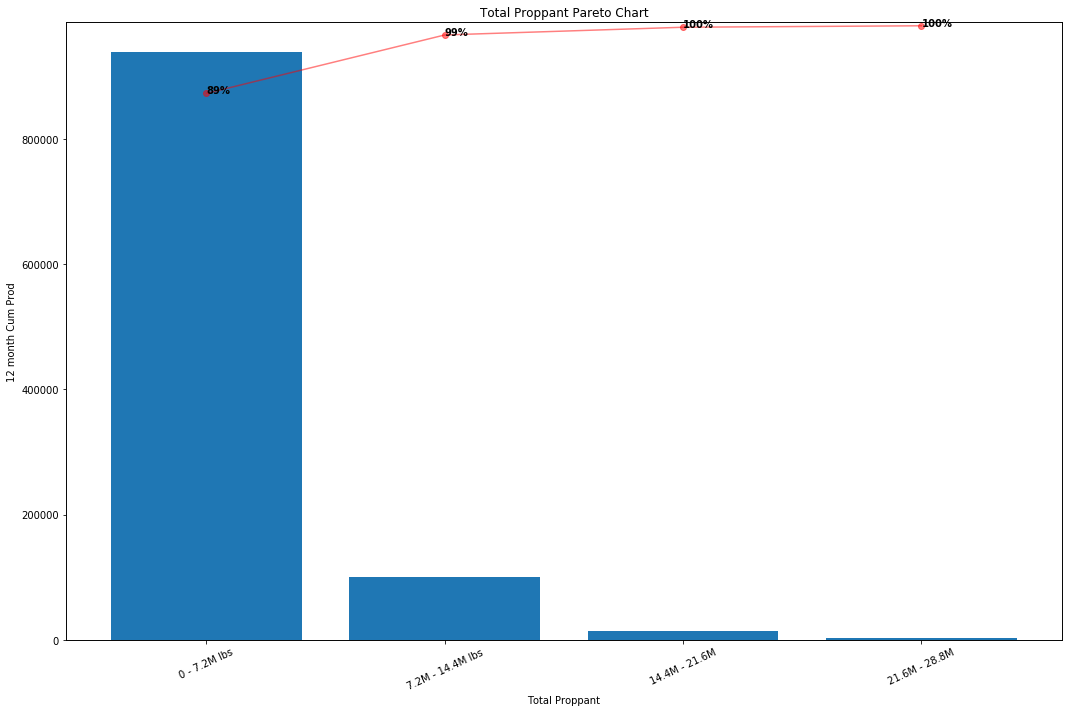

In [240]:
#Plot Pareto Chart of Total Proppant versus Cumulative Production
pareto_plot(x = TotalProp.index , counts = TotalProp.values, xlabel = 'Total Proppant', ylabel = '12 month Cum Prod')

# Plotting amount of Fluid versus Oil Production

The Cleaned and Imputed Data produced the same chart, which shows that the interval 0 to around 7.2 million pounds of Proppant are associated with a higher oil production.

## Cleaned Data and Imputed Data 

In [188]:
#Create 4 bins 
bins = (0, 149640.5, 299281.0, 448921.5 , 598562.0)
groupnames = ['0 - 150K bbls', '150K bbls - 300K bbls', '300K bbls - 450K bbls', '450K bbls- 600K bbls']
DatabaseDF['Fluid Bins'] = pd.cut(DatabaseDF['Fluid, bbls'], bins = bins, labels = groupnames)

In [189]:
#Calculate cumulative oil production for each Fluid interval
FluidAmmount_unsorted = DatabaseDF.groupby('Fluid Bins')['12 month Cum Prod'].sum()

In [191]:
#Sort chart from highest producing element to least producing element
FluidAmmount = FluidAmmount_unsorted.sort_values(ascending = False)

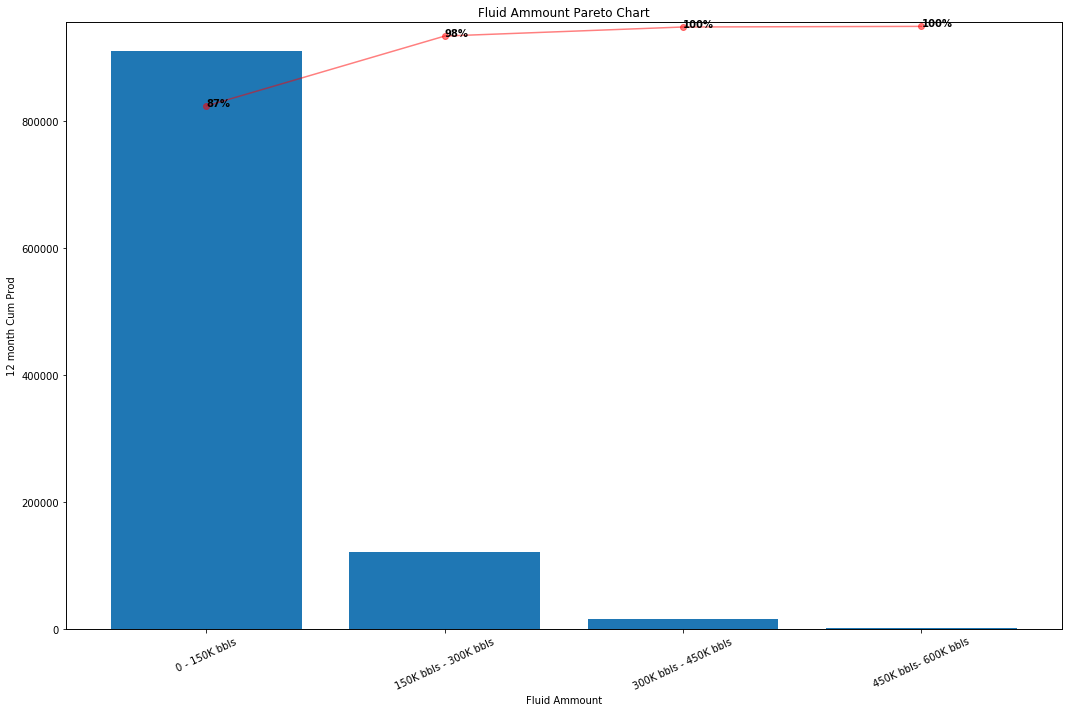

In [192]:
#Plot Pareto Chart of Fluid versus Cumulative Production
pareto_plot(x = FluidAmmount.index , counts = FluidAmmount.values, xlabel = 'Fluid Ammount', ylabel = '12 month Cum Prod')

# Plotting Spacing Capped versus Oil Production

The Cleaned and Imputed Dataset produced the same values and chart, which shows that the interval from 0 to 150 thousand barrels is associated with a higher oil production.

## Cleaned Data

In [193]:
#Create 4 bins 
bins = (18.074815, 178.55611125, 339.0374, 499.51870375, 660.0)
groupnames = ['18 - 178.6', '178.6 - 339.0', '339.0 - 500.0', '500.0 - 660.0']
DatabaseDF['Spacing Bins'] = pd.cut(DatabaseDF['SPACING_CAPPED'], bins = bins, labels = groupnames)

In [194]:
#Calculate cumulative oil production for each Spacing Capped Interval
SpacingCapped_unsorted = DatabaseDF.groupby('Spacing Bins')['12 month Cum Prod'].sum()

In [196]:
#Sort chart from highest producing element to least producing element
SpacingCapped = SpacingCapped_unsorted.sort_values(ascending = False)

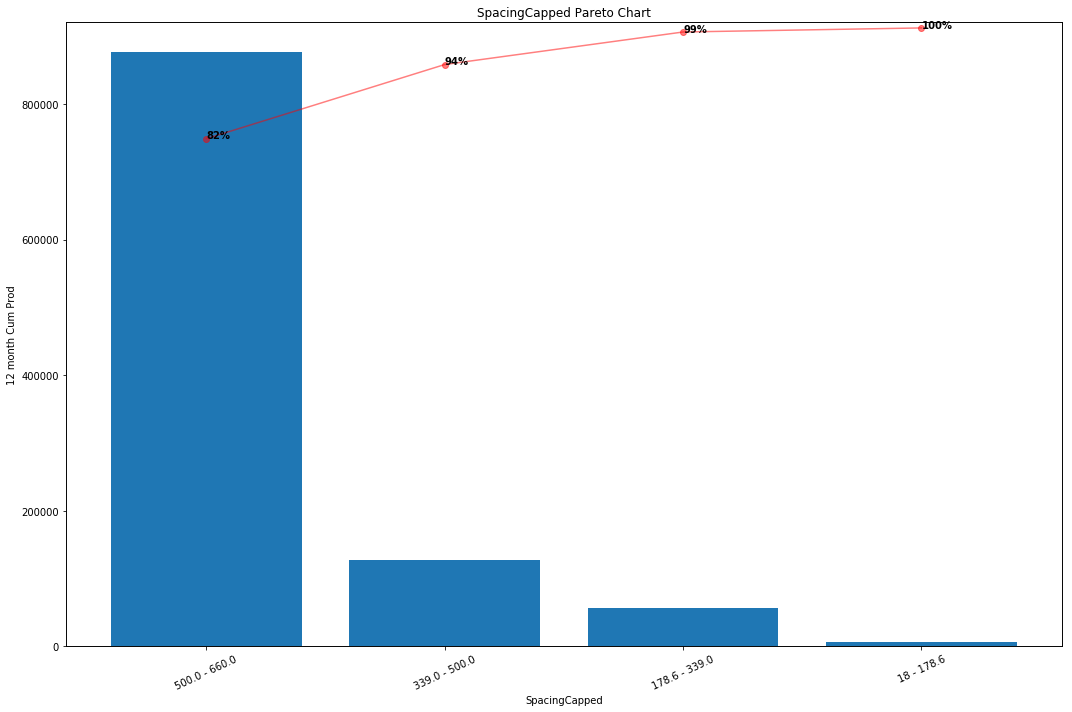

In [197]:
#Plot Pareto Chart of Spacing Capped versus Cumulative Production
pareto_plot(x = SpacingCapped.index , counts = SpacingCapped.values, xlabel = 'SpacingCapped', ylabel = '12 month Cum Prod')

## Imputed Data

In [242]:
#Create 4 bins 
bins = (18.074815, 193.67426245784378, 369.27370991568756, 544.8731573735313, 720.4726048313751)
groupnames = ['18.1 - 193.7', '193.7 - 369.3', '369.3 - 544.9', '544.9 - 720.5']
MICE_DF['Spacing Bins'] = pd.cut(MICE_DF['SPACING_CAPPED'], bins = bins, labels = groupnames)

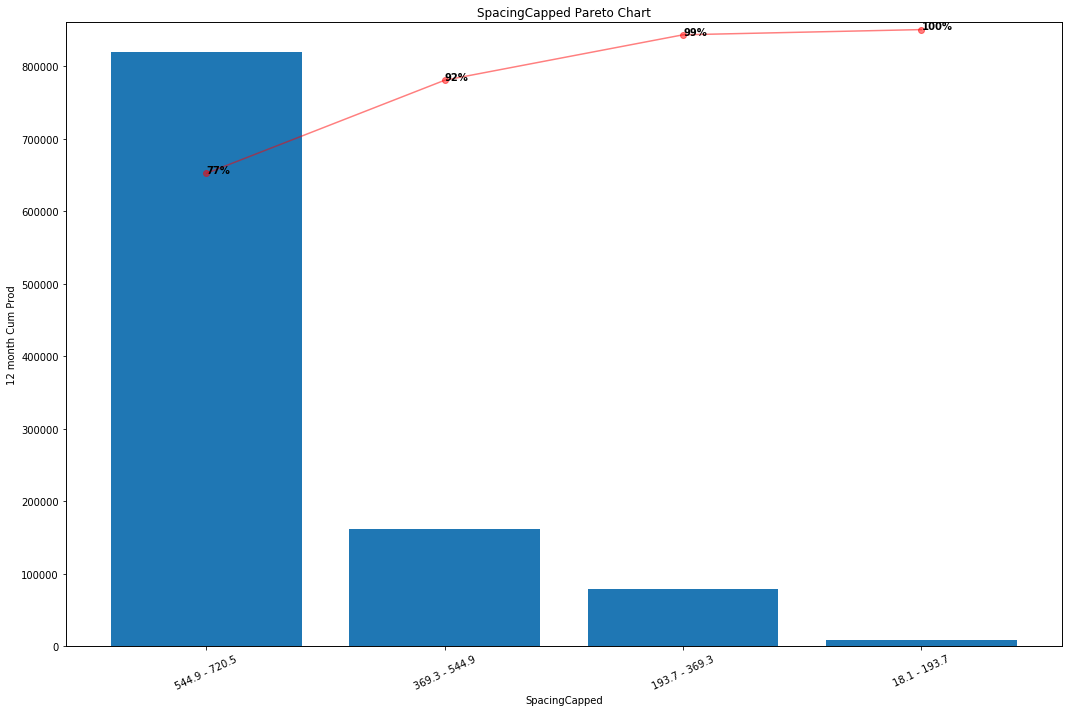

In [243]:
#Calculate cumulative oil production for each Spacing Capped Interval
SpacingCapped_unsorted = MICE_DF.groupby('Spacing Bins')['12 month Cum Prod'].sum()
#Sort chart from highest producing element to least producing element
SpacingCapped = SpacingCapped_unsorted.sort_values(ascending = False)
#Plot Pareto Chart of Spacing Capped versus Cumulative Production
pareto_plot(x = SpacingCapped.index , counts = SpacingCapped.values, xlabel = 'SpacingCapped', ylabel = '12 month Cum Prod')

# Calculating the Confidence Interval for each feature

When the Imputed Data was plotted, the percentages for each interval changed significantly. However, the interval of the largest number spacing capped still remained the interval with the highest oil production.

In [208]:
#Calculate 95% confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

''' Structure: (mean value, lower limit, upper limit) '''

In [209]:
#Returns 95% confidence interval of oil production list 
def categ_oilprod(feature_list, feature_name, df_name):
    unique_array = []
    count = 0
    oil_production = 0
    #Calculate number rows in dataframe
    num_rows = len(df_name.index) 
    for i in feature_list:
        for item in range(num_rows - 1):
            if df_name.at[item, feature_name] == i:
                count += 1
                unique_array.append(df_name.at[item,'12 month Cum Prod'])
        return mean_confidence_interval(unique_array)   

In [210]:
#Lists that will store the feature names and variance values for cleaned data
variance_oilprod = []
features_oilprod = []

In [211]:
#Lists that will store the feature names and variance values for imputed data
variance_imputed = []
features_imputed = []

In [212]:
#Prints Confidence Interval and Variance value for Cleaned Dataset 
def print_results_oilprod(feature_list, feature_name):
    print('Cleaned Dataset:')
    print()
    print(feature_name, "CI: ", categ_oilprod(feature_list, feature_name, DatabaseDF))
    variance = categ_oilprod(feature_list, feature_name, DatabaseDF)[0] - categ_oilprod(feature_list, feature_name, DatabaseDF)[1]
    print("Variance", ": ", variance)
    variance_oilprod.append(variance)
    features_oilprod.append(feature_name)

In [213]:
#Prints Confidence Interval and Variance value for Imputed Dataset 
def print_impute_oilprod(feature_list, feature_name):
    print('Imputed Dataset:')
    print()
    print(feature_name, "CI: ", categ_oilprod(feature_list, feature_name, ImputedDS))
    variance = categ_oilprod(feature_list, feature_name, ImputedDS)[0] - categ_oilprod(feature_list, feature_name, ImputedDS)[1]
    print("Variance", ": ", variance)
    variance_imputed.append(variance)
    features_imputed.append(feature_name)

In [214]:
#Prints final results for both Cleaned and Imputed data 
def print_final_results(feature_list, feature_name):
    print_results_oilprod(feature_list, feature_name)
    print()
    print_impute_oilprod(feature_list, feature_name)

In [215]:
#Prints Formation results
formation_types = ['MBH', 'TFH', 'MBH/TFH', 'TF2', 'TF4','TF3','UTFH','TF1','MTFH','TFSH','TF2.5']
print_final_results(formation_types, 'Formation')

Cleaned Dataset:

Formation CI:  (101.8378227633069, 100.53585707763811, 103.1397884489757)
Variance :  1.3019656856687902

Imputed Dataset:

Formation CI:  (101.91158088235294, 100.60913960795, 103.21402215675587)
Variance :  1.3024412744029377


In [216]:
#Prints Completion Type results
completion_types = ['OH', 'Sleeves', 'P & P', 'Sleeves and P & P', 'Screen',
       'Cemented Liner', 'Perforated Liner', 'Frac Ports',
       'Frac Ports and P & P', 'Frac Ports and Repeater Ports', 'CT',
       'P & P and CT', 'Repeater Ports and P & P']
print_final_results(completion_types, 'Completion Type')

Cleaned Dataset:

Completion Type CI:  (69.74673944687045, 66.93653226872469, 72.55694662501621)
Variance :  2.8102071781457596

Imputed Dataset:

Completion Type CI:  (69.74673944687045, 66.93653226872469, 72.55694662501621)
Variance :  2.8102071781457596


In [217]:
#Prints Fluid Type results
fluid_types = ['LINEAR GEL (HC)', 'CROSSLINKED (HC)', 'SLICKWATER (HC)',
       'SW-XL HYBRID', 'CROSSLINKED', 'UNKNOWN', 'SW-GEL HYBRID',
       'LINEAR GEL']
print_final_results(fluid_types, 'Fluid Type from DI')

Cleaned Dataset:

Fluid Type from DI CI:  (107.7898696596669, 104.85803363120016, 110.72170568813365)
Variance :  2.9318360284667477

Imputed Dataset:

Fluid Type from DI CI:  (107.07940544412608, 104.15204188242764, 110.00676900582452)
Variance :  2.927363561698442


In [218]:
#Prints Year Drilled results
year_drilled = [2006., 2005., 2007., 2008., 2004., 2009., 2011., 2012., 2010.,
       2013., 2014., 2016., 2015., 2017.]
print_final_results(year_drilled, 'Year Drilled')

Cleaned Dataset:

Year Drilled CI:  (44.029487179487184, 33.55511512321959, 54.503859235754774)
Variance :  10.47437205626759

Imputed Dataset:

Year Drilled CI:  (44.029487179487184, 33.55511512321959, 54.503859235754774)
Variance :  10.47437205626759


In [219]:
#Calculates oil production value for an interval/bin for quantitative data
def bins_oilprod(feature_name, min, max, df_name):
    count = 0
    oil_production = 0
    #Calculate number rows in dataframe
    num_rows = len(df_name.index) 
    for item in range(num_rows - 1):
        if df_name.at[item, feature_name] >= min and df_name.at[item, feature_name] <= max:
            count += 1
            oil_production += df_name.at[item,'12 month Cum Prod']
    return oil_production

In [220]:
#Returns 95% confidence interval of oil production list for Cleaned Data
def bins_CI(feature_list, feature_name, df_name):
    oilprod = []
    i = 0
    while i < len(feature_list) - 1:
        oilprod.append(bins_oilprod(feature_name, feature_list[i], feature_list[i+1], df_name))
        i += 1
    return mean_confidence_interval(oilprod)

In [221]:
#Returns 95% confidence interval of oil production list for Imputed Data
def imp_bins_CI(feature_list, feature_name, df_name):
    oilprod = []
    #for i in feature_list:
    i = 0
    while i < len(feature_list) - 1:
        oilprod.append(bins_oilprod(feature_name, feature_list[i], feature_list[i+1], df_name))
        i += 1
    return mean_confidence_interval(oilprod)

In [222]:
#Prints Confidence Interval and Variance value for Cleaned Dataset 
def print_bins_oilprod(feature_list, feature_name, df_name):
    print('Cleaned Dataset:')
    print()
    print(feature_name, "CI: ", bins_CI(feature_list, feature_name, df_name))
    variance = bins_CI(feature_list, feature_name, df_name)[0] - bins_CI(feature_list, feature_name, df_name)[1]
    print("Variance", ": ", variance)
    variance_oilprod.append(variance)
    features_oilprod.append(feature_name)

In [223]:
#Prints Confidence Interval and Variance value for Imputed Dataset 
def print_impute_oilprod(feature_list, feature_name, df_name):
    print('Imputed Dataset:')
    print()
    print(feature_name, "CI: ", imp_bins_CI(feature_list, feature_name, df_name))
    variance = imp_bins_CI(feature_list, feature_name, df_name)[0] - imp_bins_CI(feature_list, feature_name, df_name)[1]
    print("Variance", ": ", variance)
    variance_imputed.append(variance)
    features_imputed.append(feature_name)

In [224]:
#Prints final results for both Cleaned and Imputed data 
def print_bins_results(feature_list1, feature_list2, feature_name):
    print_bins_oilprod(feature_list1, feature_name, DatabaseDF)
    print()
    print_impute_oilprod(feature_list2, feature_name, MICE_DF)

In [225]:
#Prints Stage Number results
stages_bins1 = [0, 42.792682926829265, 94]
stages_bins2 = [0, 28.609928648696883, 49.25549405711213, 94]
print_bins_results(stages_bins1, stages_bins2, 'Stages')

Cleaned Dataset:

Stages CI:  (526991.6699999982, -4872634.426491168, 5926617.766491164)
Variance :  5399626.096491166

Imputed Dataset:

Stages CI:  (356062.3299999998, -391221.9088604188, 1103346.5688604184)
Variance :  747284.2388604186


In [226]:
#Prints Total Proppant results
proppant_bins = [0, 7186141.75, 14372283.5, 21558425.25, 28744567.0]
print_bins_results(proppant_bins, proppant_bins, 'Total Prop, lbs')

Cleaned Dataset:

Total Prop, lbs CI:  (267075.362499999, -463162.62286232854, 997313.3478623265)
Variance :  730237.9853623275

Imputed Dataset:

Total Prop, lbs CI:  (267075.362499999, -463162.62286232854, 997313.3478623265)
Variance :  730237.9853623275


In [227]:
#Prints Fluid results
fluid_bins = [0, 149640.5, 299281.0, 448921.5 , 598562.0]
print_bins_results(fluid_bins, fluid_bins, 'Fluid, bbls')

Cleaned Dataset:

Fluid, bbls CI:  (266348.6349999993, -439875.4721242512, 972572.7421242498)
Variance :  706224.1071242505

Imputed Dataset:

Fluid, bbls CI:  (267075.36249999935, -441287.3320652647, 975438.0570652634)
Variance :  708362.694565264


In [228]:
#Prints Spacing Capped results
spacing_bins1 = [18.074815, 178.55611125, 339.0374, 499.51870375, 660.0]
spacing_bins2 = [18.074815, 193.67426245784378, 369.27370991568756, 544.8731573735313, 720.4726048313751]
print_bins_results(spacing_bins2, spacing_bins2, 'SPACING_CAPPED')

Cleaned Dataset:

SPACING_CAPPED CI:  (266862.86999999936, -326542.6557169988, 860268.3957169976)
Variance :  593405.5257169981

Imputed Dataset:

SPACING_CAPPED CI:  (267075.36249999935, -326996.9460669629, 861147.6710669616)
Variance :  594072.3085669623


## Cleaned Dataset

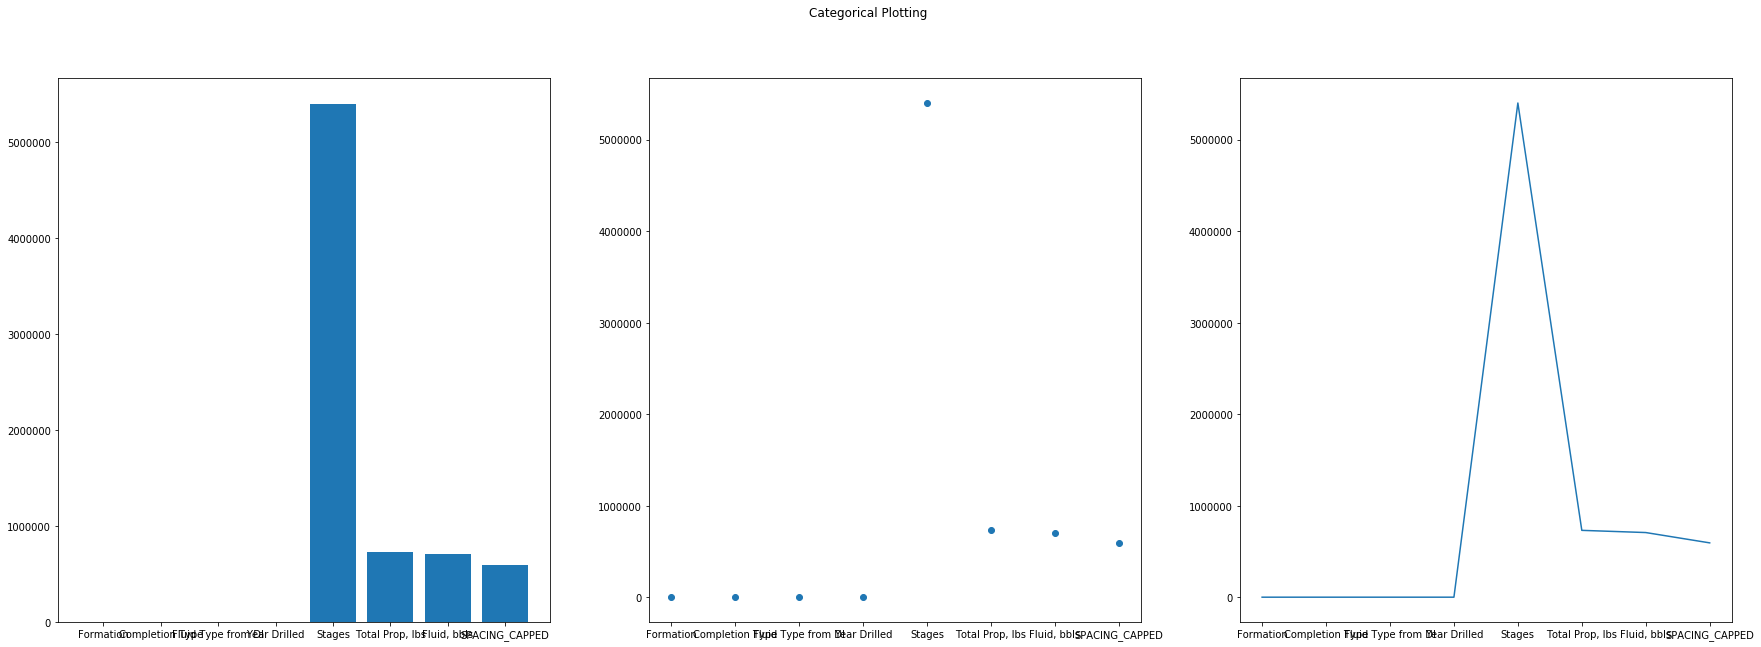

In [229]:
#Prints comparison of variance values for oil production
names = features_oilprod
values = variance_oilprod
plt.figure(figsize=(30, 10))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Imputed Dataset

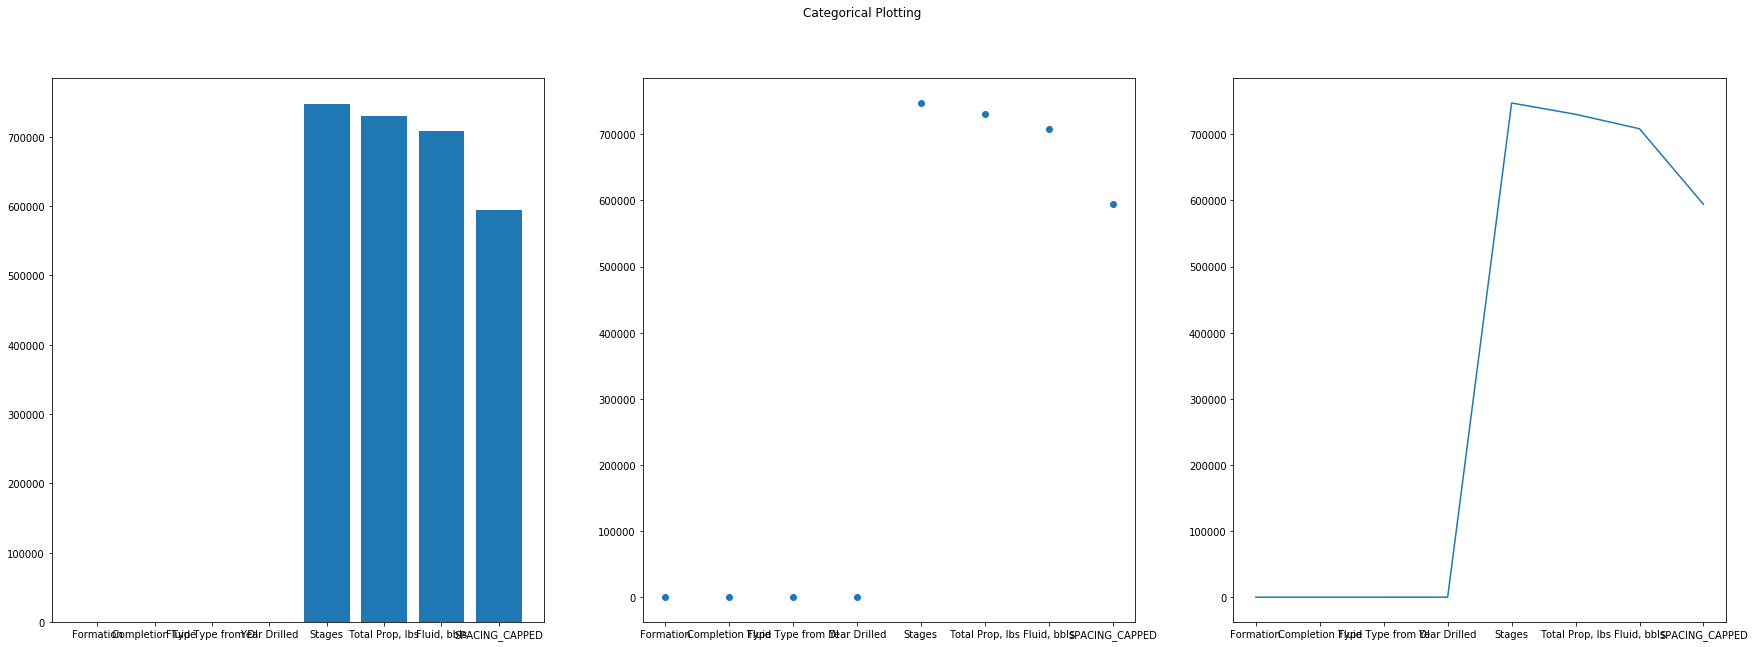

In [230]:
#Prints comparison of variance values for oil production
names = features_imputed
values = variance_imputed
plt.figure(figsize=(30, 10))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()